In [1]:
from keras.applications import VGG16
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten, concatenate, BatchNormalization
from keras import backend as k
import keras
from keras import models
from keras import layers
from keras import optimizers
import tensorflow as tf
import os
from keras.applications.vgg16 import preprocess_input
import numpy as np

Using TensorFlow backend.


<h1> Compute for Validation Set

In [2]:

from keras.models import load_model

image_size=224

test_datagen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function = preprocess_input)

# Change the batchsize according to your system RAM
test_batchsize = 16

test_generator = test_datagen.flow_from_directory(
    directory=r"datavalchallenge2",
    target_size=(224, 224),
    batch_size=1,
    class_mode=None,
    shuffle=False)

test_generator.reset()
modelfinal = load_model('outputschallenge2/Exp1/model-026.h5')

pred=modelfinal.predict_generator(test_generator,verbose=1,steps=len(test_generator))

#modelfinal.predict(test_generator, batch_size=test_batchsize, verbose=1, steps=None)



Found 500 images belonging to 1 classes.
500/500 [==============================] - 11s 22ms/step


In [4]:
submission=np.argmax(pred,axis=1)

In [7]:
label0 = submission[0:100]==0
label0acc= np.sum(label0)/100
print (label0acc)
label1 = submission[100:300]==1
label1acc= np.sum(label1)/200
print (label1acc)
label2 = submission[300:500]==2
label2acc = np.sum(label2) /200
print (label2acc)

0.72
0.875
0.795


<h1> ROC Curve

In [26]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

0.9542


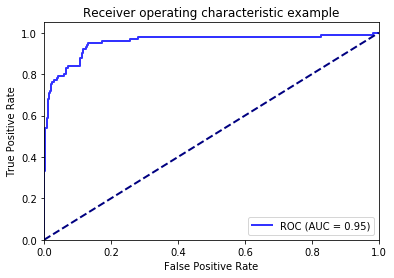

In [37]:
ylabel1=np.zeros((500,1))
ylabel1[100:500] = 1
fpr, tpr, thresholds = roc_curve(ylabel1, pred[:,0],pos_label=0)
roc_auc = auc(fpr, tpr)
print (roc_auc)
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color='b',
         label=r'ROC (AUC = %0.2f)' % (roc_auc),
         lw=2, alpha=.8)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")


0.9180583333333333


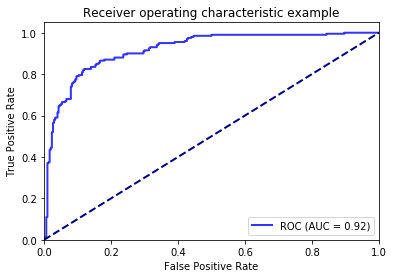

In [39]:
ylabel1=np.ones((500,1))
ylabel1[0:100] = 0
ylabel1[300:500] = 0
fpr, tpr, thresholds = roc_curve(ylabel1, pred[:,1],pos_label=1)
roc_auc = auc(fpr, tpr)
print (roc_auc)
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color='b',
         label=r'ROC (AUC = %0.2f)' % (roc_auc),
         lw=2, alpha=.8)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")


0.9422333333333333


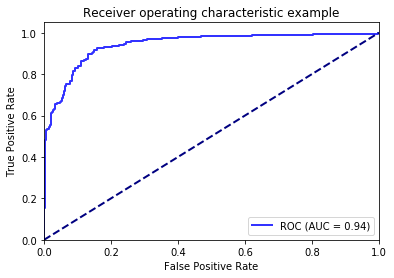

In [40]:
ylabel1=np.zeros((500,1))
ylabel1[300:500] = 2
fpr, tpr, thresholds = roc_curve(ylabel1, pred[:,2],pos_label=2)
roc_auc = auc(fpr, tpr)
print (roc_auc)
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color='b',
         label=r'ROC (AUC = %0.2f)' % (roc_auc),
         lw=2, alpha=.8)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")


<h1> Compute for Test Set

In [ ]:
from keras.models import load_model

image_size=224

test_datagen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function = preprocess_input)

# Change the batchsize according to your system RAM
test_batchsize = 16

test_generator = test_datagen.flow_from_directory(
    directory=r"testchallenge2",
    target_size=(224, 224),
    batch_size=1,
    class_mode=None,
    shuffle=False)

test_generator.reset()
modelfinal = load_model('outputschallenge2/Exp1/model-026.h5')
pred=modelfinal.predict_generator(test_generator,verbose=1,steps=len(test_generator))


In [ ]:
submission=np.argmax(pred,axis=1)
np.savetxt("submissionchal2.csv", submission, delimiter=",")